In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('P2P_Macro_Data.csv')

C:\Users\jayju\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,loan_status_5,meanopen_acc,FED_lag6,riskprem,loan_vol6m,loglvol_6m,issue_daily,issue_year,loan6m_median,loan_sum
0,11875,11875,11875.0,36 months,0.1531,413.459990,C,C2,North Slope Borough,2 years,...,0,11,0.11,3.2075,321075,12.679430,01aug2012,2012,17885976,41624367104
1,11500,11500,11500.0,36 months,0.1849,418.590000,D,D2,"Ulmers Burgess, Inc",1 year,...,0,11,0.11,3.2075,321075,12.679430,01aug2012,2012,17885976,41624367104
2,2300,2300,2300.0,36 months,0.0890,73.040001,A,A5,Metlakatla Indian Community,10+ years,...,0,11,0.11,3.2075,192200,12.166292,01sep2012,2012,17885976,41624367104
3,19600,19600,19600.0,36 months,0.1409,670.739990,B,B5,USAF,7 years,...,6,11,0.09,3.2150,192200,12.166292,01sep2012,2012,17885976,41624367104
4,3900,3900,3900.0,36 months,0.1311,131.620000,B,B4,US Army,7 years,...,6,11,0.09,3.2150,192200,12.166292,01sep2012,2012,17885976,41624367104


In [7]:
dataset = df[['acc_open_past_24mths', 'addr_state', 'annual_inc', 
              'application_type', 'avg_cur_bal', 'emp_length', 'dti', 
              'grade', 'home_ownership', 'il_util', 'inq_fi', 'inq_last_12m', 
              'int_rate', 'installment', 'issue_d', 'loan_status', 'loan_amnt', 'open_acc',
              'revol_bal', 'revol_util', 'term', 'total_acc', 'verification_status']]

In [8]:
dataset.shape

(2703430, 23)

In [1]:
dataset.dropna(inplace = True)
dataset.shape

NameError: name 'dataset' is not defined

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1527586 entries, 1945 to 2703428
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   acc_open_past_24mths  1527586 non-null  int64  
 1   addr_state            1527586 non-null  object 
 2   annual_inc            1527586 non-null  float64
 3   application_type      1527586 non-null  object 
 4   avg_cur_bal           1527586 non-null  int64  
 5   emp_length            1527586 non-null  object 
 6   dti                   1527586 non-null  float64
 7   grade                 1527586 non-null  object 
 8   home_ownership        1527586 non-null  object 
 9   il_util               1527586 non-null  float64
 10  inq_fi                1527586 non-null  float64
 11  inq_last_12m          1527586 non-null  float64
 12  int_rate              1527586 non-null  float64
 13  installment           1527586 non-null  float64
 14  issue_d               1527586 n

In [38]:
dataset.to_csv('raw_features.csv')

OSError: [Errno 28] No space left on device

### Checking unique value types

In [10]:
dataset.loan_status.value_counts()

Current               1261160
Fully Paid             189360
Charged Off             38493
Late (31-120 days)      21509
In Grace Period         11801
Late (16-30 days)        5178
Default                    85
Name: loan_status, dtype: int64

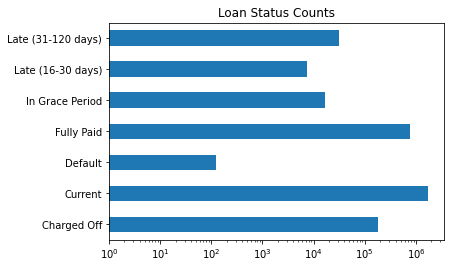

In [37]:
import matplotlib.pyplot as plt


plt = df.loan_status.value_counts().sort_index().plot.barh(title = 'Loan Status Counts' ,
                                                   log = True)

In [ ]:
dataset.loan_status.value_counts()

In [11]:
dataset.application_type.value_counts()

Individual    1037035
INDIVIDUAL     346363
Joint App      134760
JOINT            6972
DIRECT_PAY       2456
Name: application_type, dtype: int64

In [12]:
dataset.term.value_counts()

 36 months    1064311
 60 months     463275
Name: term, dtype: int64

In [13]:
dataset.verification_status.value_counts()

Source Verified    620450
Not Verified       593431
Verified           313705
Name: verification_status, dtype: int64

In [64]:
dataset.home_ownership.value_counts()

1       774832
2       649058
3       182046
NONE        28
Name: home_ownership, dtype: int64

In [82]:
dataset.emp_length.value_counts()

10    536524
2     144473
0     132951
3     128377
1     110342
5      99326
4      96300
6      72099
7      65391
8      64956
9      55340
Name: emp_length, dtype: int64

In [16]:
dataset.term.value_counts()

 36 months    1064311
 60 months     463275
Name: term, dtype: int64

In [17]:
dataset.grade.value_counts()

B    449531
C    428115
A    355892
D    214384
E     57533
F     16295
G      5836
Name: grade, dtype: int64

In [18]:
dataset.loan_status.value_counts()

Current               1261160
Fully Paid             189360
Charged Off             38493
Late (31-120 days)      21509
In Grace Period         11801
Late (16-30 days)        5178
Default                    85
Name: loan_status, dtype: int64

### Change data types

#### APPLICATION_TYPE - Filter only Individual loans

In [45]:
dataset.application_type.replace(to_replace = 'INDIVIDUAL' , value = 'Individual' , inplace = True)

In [46]:
dataset = dataset[dataset.application_type.str.startswith('Individual')]

In [47]:
dataset.application_type.value_counts()

Individual    1607771
Name: application_type, dtype: int64

#### LOAN_STATUS - Change loan status classification to Current, Default, or Fully Paid

In [10]:
#Assumes any loans not paid on time is considered in "Default". Although not technically true, makes the analysis easier 
#and allows for the model to err on the side of caution

#Grace Period loans = Current, technically not late
dataset.loan_status.replace(to_replace = 'In Grace Period' , value = '1' , inplace = True)
dataset.loan_status.replace(to_replace = 'Current' , value = '1' , inplace = True)
dataset.loan_status.replace(to_replace = 'Fully Paid' , value = '1' , inplace = True)

#Assumes any late loans means borrower is not credit worthy
dataset.loan_status.replace(to_replace = 'Default' , value = '0' , inplace = True)
dataset.loan_status.replace(to_replace = 'Charged Off' , value = '0' , inplace = True)
dataset.loan_status.replace(to_replace = 'Late (31-120 days)' , value = '0' , inplace = True)
dataset.loan_status.replace(to_replace = 'Late (16-30 days)' , value = '0' , inplace = True)

C:\Users\jayju\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [11]:
dataset['loan_status'] = dataset['loan_status'].astype('int')

<ipython-input-11-04a5da21b141>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['loan_status'] = dataset['loan_status'].astype('int')


In [12]:
dataset.loan_status.value_counts()

1    2486808
0     216622
Name: loan_status, dtype: int64

<AxesSubplot:>

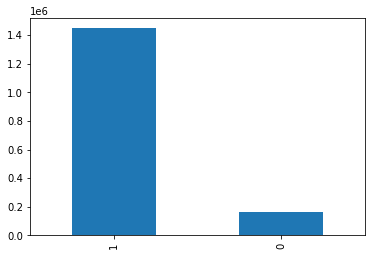

In [49]:
dataset.loan_status.value_counts().plot.bar()

#### VERIFICATION_STATUS - Filter only loans with verified incomes

In [41]:
i = dataset[(dataset.verification_status == 'Not Verified')].index
print(i)

Int64Index([      1,       3,       5,       6,       7,      10,      11,
                 14,      19,      20,
            ...
            2703412, 2703414, 2703415, 2703416, 2703417, 2703419, 2703420,
            2703423, 2703427, 2703428],
           dtype='int64', length=976870)


In [42]:
dataset = dataset.drop(i)

In [43]:
dataset.loan_status.value_counts()

1    1561039
0     165521
Name: loan_status, dtype: int64

#### HOME_OWNERSHIP - Drop loans that have "any" as home ownership type then convert data to ints

In [67]:
z = dataset[(dataset.home_ownership == 'ANY')].index

#Replace Mortgage with 1
dataset.home_ownership.replace(to_replace = 'MORTGAGE' , value = 1 , inplace = True)

#Repalce Renters with 2
dataset.home_ownership.replace(to_replace = 'RENT' , value = 2 , inplace = True)

#Replace Owners with 3
dataset.home_ownership.replace(to_replace = 'OWN' , value = 3 , inplace = True)

In [68]:
dataset = dataset.drop(z)

In [69]:
dataset['home_ownership'] = dataset['home_ownership'].astype('int')

#### TERM - Show loan term as months (int)

In [73]:
dataset['term'] = dataset['term'].astype(str)

In [74]:
dataset.term.replace(to_replace = "36 months" , value = '36' , inplace = True , regex = True)
dataset.term.replace(to_replace = "60 months" , value = '60' , inplace = True , regex = True)

In [75]:
dataset.head()

,acc_open_past_24mths,addr_state,annual_inc,application_type,avg_cur_bal,emp_length,dti,grade,home_ownership,il_util,...,installment,issue_d,loan_status,loan_amnt,open_acc,revol_bal,revol_util,term,total_acc,verification_status
0,2,AK,49800.0,Individual,28975,2 years,25.120001,C,1,NaN,...,413.459990,Aug-12,1,11875,8,22773,0.906,36,21,Source Verified
2,0,AK,34000.0,Individual,1656,10+ years,25.590000,A,2,NaN,...,73.040001,Sep-12,1,2300,3,0,0.000,36,14,Verified
4,2,AK,29000.0,Individual,2817,7 years,8.150000,B,2,NaN,...,131.620000,Sep-12,0,3900,4,5633,0.828,36,6,Source Verified
8,5,AK,110000.0,Individual,6629,5 years,25.870001,G,2,NaN,...,612.690000,Sep-12,1,21000,25,17811,0.604,60,62,Source Verified
9,4,AK,77000.0,Individual,3288,10+ years,15.280000,E,1,NaN,...,831.900020,Sep-12,1,30750,9,26330,0.798,60,23,Verified


In [76]:
dataset['term'] = dataset['term'].astype('int')

#### SUB_GRADE - Converting from alphabetical grading to numerical

In [77]:
dataset['grade'] = dataset['grade'].astype('string')

In [78]:
dataset.grade.replace(to_replace = 'A' , value = '1' , inplace = True)
dataset.grade.replace(to_replace = 'B' , value = '2' , inplace = True)
dataset.grade.replace(to_replace = 'C' , value = '3' , inplace = True)
dataset.grade.replace(to_replace = 'D' , value = '4' , inplace = True)
dataset.grade.replace(to_replace = 'E' , value = '5' , inplace = True)
dataset.grade.replace(to_replace = 'F' , value = '6' , inplace = True)
dataset.grade.replace(to_replace = 'G' , value = '7' , inplace = True)

In [79]:
dataset['grade'] = dataset['grade'].astype('int')

#### EMP_LENGTH - Converting from alphabetical to numerical

In [80]:
dataset.emp_length.replace(to_replace = '< 1 year' , value = '0' , inplace = True)
dataset.emp_length.replace(to_replace = '1 year' , value = '1' , inplace = True)
dataset.emp_length.replace(to_replace = '2 years' , value = '2' , inplace = True)
dataset.emp_length.replace(to_replace = '3 years' , value = '3' , inplace = True)
dataset.emp_length.replace(to_replace = '4 years' , value = '4' , inplace = True)
dataset.emp_length.replace(to_replace = '5 years' , value = '5' , inplace = True)
dataset.emp_length.replace(to_replace = '6 years' , value = '6' , inplace = True)
dataset.emp_length.replace(to_replace = '7 years' , value = '7' , inplace = True)
dataset.emp_length.replace(to_replace = '8 years' , value = '8' , inplace = True)
dataset.emp_length.replace(to_replace = '9 years' , value = '9' , inplace = True)
dataset.emp_length.replace(to_replace = '10+ years' , value = '10' , inplace = True)


In [85]:
dataset['emp_length'] = dataset['emp_length'].astype('int')

ValueError: cannot convert float NaN to integer

#### ISSUE_D - Converting to datetime format

### Export to CSV

In [83]:
dataset.head()

,acc_open_past_24mths,addr_state,annual_inc,application_type,avg_cur_bal,emp_length,dti,grade,home_ownership,il_util,...,installment,issue_d,loan_status,loan_amnt,open_acc,revol_bal,revol_util,term,total_acc,verification_status
0,2,AK,49800.0,Individual,28975,2,25.120001,3,1,NaN,...,413.459990,Aug-12,1,11875,8,22773,0.906,36,21,Source Verified
2,0,AK,34000.0,Individual,1656,10,25.590000,1,2,NaN,...,73.040001,Sep-12,1,2300,3,0,0.000,36,14,Verified
4,2,AK,29000.0,Individual,2817,7,8.150000,2,2,NaN,...,131.620000,Sep-12,0,3900,4,5633,0.828,36,6,Source Verified
8,5,AK,110000.0,Individual,6629,5,25.870001,7,2,NaN,...,612.690000,Sep-12,1,21000,25,17811,0.604,60,62,Source Verified
9,4,AK,77000.0,Individual,3288,10,15.280000,5,1,NaN,...,831.900020,Sep-12,1,30750,9,26330,0.798,60,23,Verified


In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605936 entries, 0 to 2703429
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   acc_open_past_24mths  1605936 non-null  int64  
 1   addr_state            1605936 non-null  object 
 2   annual_inc            1605936 non-null  float64
 3   application_type      1605936 non-null  object 
 4   avg_cur_bal           1605936 non-null  int64  
 5   emp_length            1506079 non-null  object 
 6   dti                   1605936 non-null  float64
 7   grade                 1605936 non-null  int32  
 8   home_ownership        1605936 non-null  int32  
 9   il_util               889337 non-null   float64
 10  inq_fi                1036844 non-null  float64
 11  inq_last_12m          1036844 non-null  float64
 12  int_rate              1605936 non-null  float64
 13  installment           1605936 non-null  float64
 14  issue_d               1605936 non-

In [82]:
dataset.reset_index(drop = True , inplace=True)

In [70]:
dataset.shape

(1605936, 23)

In [84]:
dataset.to_csv('Data v2.csv' , index = False)

In [71]:
dataset.loan_status.value_counts()

1    1445597
0     160339
Name: loan_status, dtype: int64